In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
from statistics import linear_regression
import matplotlib.pyplot as plt

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

from matplotlib.lines import Line2D

import energy_analysis_helpers

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-z213f9lw because the default path (/home/sarslan/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
FIG_SIZE = (8,5)
plt.rcParams["figure.figsize"] = FIG_SIZE
FONT_SIZE = 16
LINE_STYLE = (0,(4,4))
LINE_WIDTH = 3.5
SAVE_FIG = False

In [3]:
N_CORES_TOT = 32

EXP_ID = '230524-1158'
data_folder = '../data/' + EXP_ID + '/'
exp_filename = data_folder + 'energy.log'

if (SAVE_FIG):
    out_dir = '../outputs/' + EXP_ID + '/'
    if (not os.path.exists(out_dir)):
        os.mkdir(out_dir)

# Reading the Experiment Data

In [4]:
exp_df = energy_analysis_helpers.read_energy_log(exp_filename)
exp_df['energy_kJ'] = exp_df['energy_uJ'] * 10e-9
exp_df = energy_analysis_helpers.read_iperf_log(exp_df, data_folder)
exp_df

,cc,mtu,bitrate,n_core,duration,cnt,energy_uJ,energy_kJ,total_cpu_util_percent,user_cpu_util_percent,system_cpu_util_percent,time_sec,sent_bytes,bps,rtx_pkts,min_rtt,mean_rtt,max_rtt,max_cwnd
0,stress,9000,0,0,10.0,1,2.348596e+08,2.348596,NaN,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,stress,9000,0,0,10.0,2,2.128971e+08,2.128971,NaN,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,stress,9000,0,0,10.0,3,2.219296e+08,2.219296,NaN,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,stress,9000,0,0,10.0,4,2.107860e+08,2.107860,NaN,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,stress,9000,0,0,10.0,5,2.310167e+08,2.310167,NaN,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4317,cubic,9000,10,24,100.0,6,1.156185e+10,115.618467,96.863017,2.401998,94.461022,100.000117,1.228548e+11,9.828375e+09,2463.0,1.126,1.243,1.361,1539056.0
4318,cubic,9000,10,24,100.0,7,1.159283e+10,115.928282,99.107230,2.712203,96.395031,100.000134,1.193934e+11,9.551455e+09,1303.0,0.271,0.803,1.335,1718016.0
4319,cubic,9000,10,24,100.0,8,1.156537e+10,115.653748,97.048425,2.358970,94.689462,100.000072,1.231359e+11,9.850861e+09,2593.0,1.191,1.280,1.369,1753808.0
4320,cubic,9000,10,24,100.0,9,1.158624e+10,115.862426,97.100455,2.358178,94.742277,100.000108,1.229387e+11,9.835087e+09,2614.0,1.180,1.197,1.215,1592744.0


# Energy Consumption Analysis

In [5]:
if ('n_core' not in exp_df.columns):
    exp_df.groupby(['duration', 'cc'])['energy_kJ'].mean().unstack().plot.bar(
        yerr=exp_df.groupby(['duration', 'cc'])['energy_kJ'].std().unstack(), 
        error_kw=dict(lw=2, capsize=3, capthick=1, ecolor='black')
        )

    plt.xlabel('Experiment Duration (sec)', fontsize=FONT_SIZE)
    plt.ylabel('Ave. Energy (KJ)', fontsize=FONT_SIZE)
    plt.xticks(fontsize=FONT_SIZE)
    plt.yticks(fontsize=FONT_SIZE)
    # plt.ylim((0,50))
    plt.xticks(rotation = 0)
    plt.grid(linestyle=LINE_STYLE)
    leg = plt.gca().legend(loc='upper left', frameon=False, fontsize=FONT_SIZE)
    # plt.setp(leg.get_title(),fontsize=FONT_SIZE)
    plt.gca().spines["right"].set_linestyle(LINE_STYLE)
    plt.gca().spines["right"].set_alpha(0.5)
    plt.gca().spines["right"].set_color('gray')
    plt.gca().spines["left"].set_linestyle(LINE_STYLE)
    plt.gca().spines["left"].set_alpha(0.5)
    plt.gca().spines["left"].set_color('gray')
    plt.gca().spines["top"].set_visible(False)
    # plt.gca().spines["top"].set_linestyle(LINE_STYLE)
    # plt.gca().spines["top"].set_alpha(0.5)
    # plt.gca().spines["top"].set_color('gray')
    plt.gca().spines["bottom"].set_linestyle(LINE_STYLE)
    plt.gca().spines["bottom"].set_alpha(0.5)
    plt.gca().spines["bottom"].set_color('gray')
    plt.tight_layout()

    if (SAVE_FIG):
        plt.savefig( out_dir + '/cubic_vs_sleep_energy.pdf')

    plt.show()

/tmp/ipykernel_1092959/2884813108.py:58: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


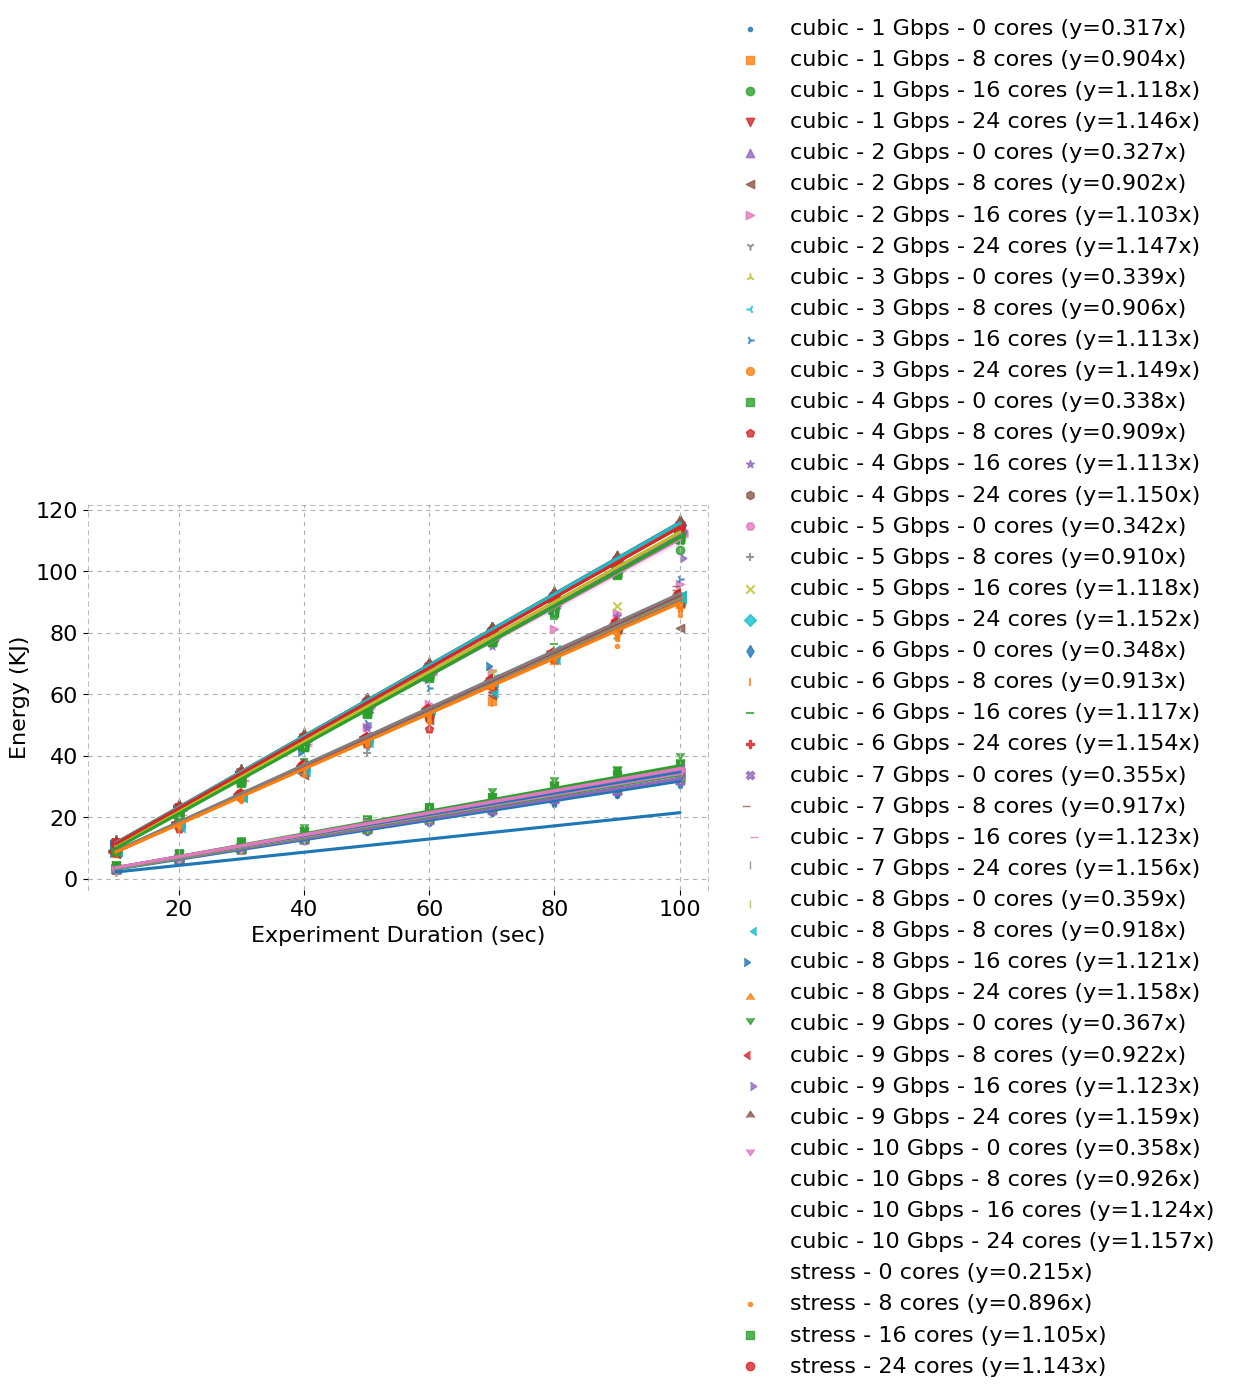

In [6]:
plt.figure(figsize=FIG_SIZE)

energy_per_time_df = []
marker = 0
for cca, df in exp_df.groupby('cc'):
    # x = np.hstack((np.reshape(ddf['time_sec'], (-1, 1)), np.ones((len(ddf),1))))
    # y = np.reshape(ddf['energy_kJ'], (-1, 1))
    # fit = np.linalg.lstsq(x, y, rcond=None)[0]

    if (cca in ['stress', 'sleep']):
        for n_core, ddf in df.groupby('n_core'):
            slope, _ = linear_regression(ddf['time_sec'], ddf['energy_kJ'], proportional=True)
            label = '{} - {} cores (y={:.3f}x)'.format(cca, n_core, slope)
            energy_per_time_df.append([cca, 0, n_core, slope])

            sns.regplot(ddf, x = 'time_sec', y = 'energy_kJ', label=label, 
                        ax=plt.gca(), marker=list(Line2D.markers.keys())[marker])
            marker += 1
            marker %= len(list(Line2D.markers.keys()))
    else:
        for bitrate, ddf in df.groupby('bitrate'):
            for n_core, dddf in ddf.groupby('n_core'):
                slope, _ = linear_regression(dddf['time_sec'], dddf['energy_kJ'], proportional=True)
                label = '{} - {} Gbps - {} cores (y={:.3f}x)'.format(cca, bitrate, n_core, slope)
                energy_per_time_df.append([cca, bitrate, n_core, slope])

                sns.regplot(dddf, x = 'time_sec', y = 'energy_kJ', label=label, 
                            ax=plt.gca(),  marker=list(Line2D.markers.keys())[marker])
                marker += 1
                marker %= len(list(Line2D.markers.keys()))
energy_per_time_df = pd.DataFrame(energy_per_time_df, columns=['cc', 'bitrate', 'n_core', 'kJps'])

plt.xlabel('Experiment Duration (sec)', fontsize=FONT_SIZE)
plt.ylabel('Energy (KJ)', fontsize=FONT_SIZE)
plt.xticks(fontsize=FONT_SIZE)
plt.yticks(fontsize=FONT_SIZE)
# plt.ylim((0,40))
plt.xticks(rotation = 0)
plt.grid(linestyle=LINE_STYLE)
leg = plt.gca().legend(loc='center left', frameon=False, fontsize=FONT_SIZE,
                       bbox_to_anchor=(1., 0.5))
# plt.setp(leg.get_title(),fontsize=FONT_SIZE)
plt.gca().spines["right"].set_linestyle(LINE_STYLE)
plt.gca().spines["right"].set_alpha(0.5)
plt.gca().spines["right"].set_color('gray')
plt.gca().spines["left"].set_linestyle(LINE_STYLE)
plt.gca().spines["left"].set_alpha(0.5)
plt.gca().spines["left"].set_color('gray')
# plt.gca().spines["top"].set_visible(False)
plt.gca().spines["top"].set_linestyle(LINE_STYLE)
plt.gca().spines["top"].set_alpha(0.5)
plt.gca().spines["top"].set_color('gray')
plt.gca().spines["bottom"].set_visible(False)
# plt.gca().spines["bottom"].set_linestyle(LINE_STYLE)
# plt.gca().spines["bottom"].set_alpha(0.5)
# plt.gca().spines["bottom"].set_color('gray')

plt.tight_layout()
# plt.subplots_adjust(right=0.3, top=0.1, bottom=0.05)

if (SAVE_FIG):
    plt.savefig( out_dir + '/cubic_vs_stress_energy_fit.pdf')
    energy_per_time_df.to_csv(out_dir + '/energy_per_sec.csv', 
                              encoding='utf-8', index=False)

plt.show()

In [7]:
overhead_energy = \
    energy_per_time_df[energy_per_time_df.cc=='stress'][['n_core', 'kJps']].copy().set_index('n_core').to_dict()['kJps']
energy_per_time_df['kJps_noOverhead'] = \
    energy_per_time_df.apply(lambda row: row['kJps'] - overhead_energy[row['n_core']], axis=1)

In [8]:
matrix = energy_per_time_df.pivot(index='bitrate', columns='n_core', values='kJps')
print('=== Power Consumption of Traffic and Background Cores (kJps) ===\n')
print(matrix)

=== Power Consumption of Traffic and Background Cores (kJps) ===

n_core         0         8         16        24
bitrate                                        
0        0.214920  0.896027  1.104587  1.143311
1        0.317200  0.903929  1.118162  1.145671
2        0.326537  0.902257  1.102773  1.147017
3        0.338873  0.906067  1.113002  1.148797
4        0.337676  0.908863  1.113453  1.150213
5        0.342335  0.909886  1.117843  1.152250
6        0.348210  0.912918  1.117149  1.154268
7        0.355466  0.916765  1.122748  1.156103
8        0.358559  0.917818  1.121159  1.157691
9        0.366897  0.921614  1.123461  1.158845
10       0.358231  0.926377  1.123559  1.157353


In [9]:
matrix = energy_per_time_df.pivot(index='bitrate', columns='n_core', values='kJps_noOverhead')
print('=== Power Consumption of Traffic Only (kJps) ===\n')
print(matrix)

=== Power Consumption of Traffic Only (kJps) ===

n_core         0         8         16        24
bitrate                                        
0        0.000000  0.000000  0.000000  0.000000
1        0.102280  0.007902  0.013575  0.002360
2        0.111617  0.006230 -0.001814  0.003706
3        0.123953  0.010040  0.008416  0.005486
4        0.122756  0.012836  0.008866  0.006902
5        0.127416  0.013860  0.013257  0.008938
6        0.133290  0.016891  0.012563  0.010957
7        0.140547  0.020738  0.018161  0.012792
8        0.143639  0.021791  0.016573  0.014380
9        0.151977  0.025588  0.018874  0.015533
10       0.143312  0.030350  0.018973  0.014041


Slope for 0 core(s) case: 1.0%
Slope for 8 core(s) case: 0.3%
Slope for 16 core(s) case: 0.2%
Slope for 24 core(s) case: 0.2%


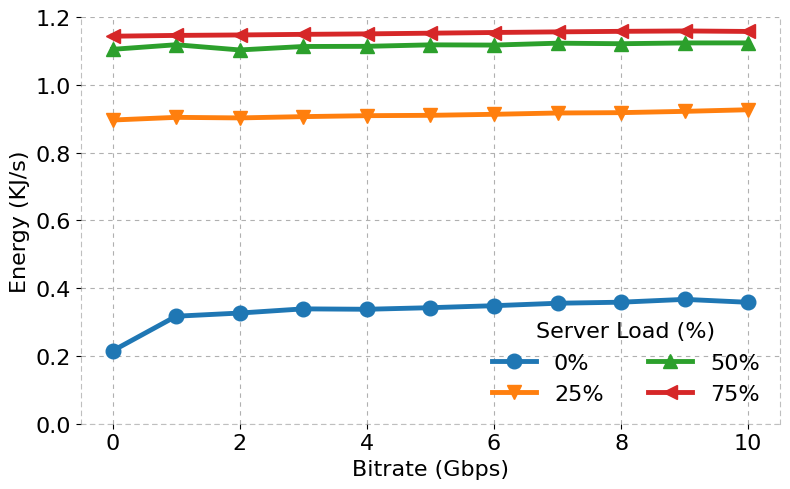

In [10]:
plt.figure(figsize=FIG_SIZE)
marker = 2
for n_core, df in energy_per_time_df.sort_values(by='bitrate').groupby('n_core'):
    x = np.hstack((np.reshape(df['bitrate'], (-1, 1)), np.ones((len(df),1))))
    y = np.reshape(df['kJps'], (-1, 1))
    fit = np.linalg.lstsq(x, y, rcond=None)[0]
    print("Slope for {} core(s) case: {:.1f}%".format(n_core, fit[0][0]*100))

    plt.plot(df['bitrate'], df['kJps'], 
             label="{:.0f}%".format(n_core/N_CORES_TOT*100), 
             linewidth=LINE_WIDTH, marker=list(Line2D.markers.keys())[marker],
             markersize=LINE_WIDTH*3)
    marker += 1

plt.xlabel('Bitrate (Gbps)', fontsize=FONT_SIZE)
plt.ylabel('Energy (KJ/s)', fontsize=FONT_SIZE)
plt.xticks(fontsize=FONT_SIZE)
plt.yticks(fontsize=FONT_SIZE)
# plt.xlim((0, 10))
plt.ylim((0, 1.2))
plt.grid(linestyle=LINE_STYLE)
leg = plt.legend(loc='lower right', frameon=False, fontsize=FONT_SIZE, ncol=2, title='Server Load (%)')
plt.setp(leg.get_title(),fontsize=FONT_SIZE)

plt.gca().spines["right"].set_linestyle(LINE_STYLE)
plt.gca().spines["right"].set_alpha(0.5)
plt.gca().spines["right"].set_color('gray')
plt.gca().spines["left"].set_linestyle(LINE_STYLE)
plt.gca().spines["left"].set_alpha(0.5)
plt.gca().spines["left"].set_color('gray')
plt.gca().spines["top"].set_visible(False)
# plt.gca().spines["top"].set_linestyle(LINE_STYLE)
# plt.gca().spines["top"].set_alpha(0.5)
# plt.gca().spines["top"].set_color('gray')
plt.gca().spines["bottom"].set_linestyle(LINE_STYLE)
plt.gca().spines["bottom"].set_alpha(0.5)
plt.gca().spines["bottom"].set_color('gray')
plt.tight_layout()

if (SAVE_FIG):
    plt.savefig( out_dir + '/energy_vs_bitrate_per_nCore.pdf')

plt.show()